In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [18]:
# 이 데이터에는 불행하게 끝났던 여행의 각 승객에 대한 성별, 나이, 좌석 등급, 요금 등 다양한 정보가 담겨 있다
titanic.head()

512.3292

In [3]:
# GroupBy연산을 적용하여 성별에 따른 생존율을 알아보자
titanic.groupby('sex')[['survived']].mean()
# 전반전으로 승선하고 있던 여성의 네 명 중 세명이 생존한 반면, 남성은 다섯 명 중 한명명 생존했다.

,survived
sex,
female,0.742038
male,0.188908


In [6]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [7]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
#피벗 테이블(Pivot Table)구문
# DataFrame의 pivot_table 메서드를 사용
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
# 다 차원 피벗 테이블(pivot tables)
# GroupBy에서와 마찬가지로 피벗 테이블의 그룹핑은 다단계로 여러 가지 옵션을 통해 지정할 수 있다.
# 세번째 차원으로 연령을 보고 싶을 수 있다. pd.cut함수를 사용해 연령 을 추가하자
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [19]:
# 열 기준으로 동작할 때도 이와 같은 전략을 적용할 수 있다. 자동으로 분위 수를 계산하기 위해 pd.qcut를 사용해 지불된 내용에 대한 정보를 추가하자
fare = pd.qcut(titanic['fare'], 2) 
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])
# 결과는 값 사이의 관계를 보여주는 그리드에 나타난 계층적 인덱스를 가진 4차원 집계다.

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [23]:
# 기타(pivot table)옵션
titanic.pivot_table(index='sex', columns='class',
     	               aggfunc={'survived':'sum', 'fare':'mean'})
# 여기서 values키워드는 생략했는데 aggfunc을 위한 매핑을 지정할 때 이 키워드가 자동으로 결정된다는 점도 알아두자.

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [24]:
# 때로는 그룹별 총합을 계산하는 것이 유용할 수 있다. 이 계산은 margins키워드를 통해 수행할 수 있다.
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [26]:
# 예제 : 출생률 데이터
# 결과로 월과 일을 인덱스로 가지는 다중 인덱스를 얻게 된다
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [27]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


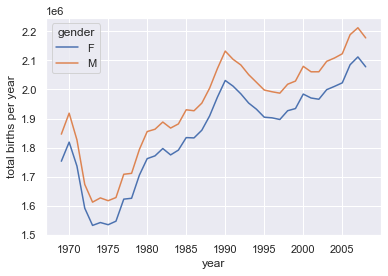

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');